# Springboard Data Science Career Track Unit 4 Challenge - Tier 3 Complete

## Problem Statement

***Which boroughs of London have seen the greatest increase in housing prices, on average, over the last two decades?***

### 1. Sourcing and Loading

#### 1.1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

#### 1.2.  Loading the data
**Source:** [London Datastore](https://data.london.gov.uk/): free, open-source data-sharing portal for London-oriented datasets. 

In [2]:
# Creating DataFrame from the loaded data
url_LondonHousePrices = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"
properties = pd.read_excel(url_LondonHousePrices, sheet_name='Average price', index_col= None)

### 2. Cleaning, transforming, and visualizing

**2.1. Exploring the data**

In [3]:
properties.head()

,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
0,NaT,E09000001,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,...,E12000002,E12000003,E12000004,E12000005,E12000006,E12000007,E12000008,E12000009,NaN,E92000001
1,1995-01-01,91449,50460.2,93284.5,64958.1,71306.6,81671.5,120933,69158.2,79885.9,...,43958.5,44803.4,45544.5,48527.5,56701.6,74435.8,64018.9,54705.2,NaN,53202.8
2,1995-02-01,82202.8,51085.8,93190.2,64787.9,72022.3,81657.6,119509,68951.1,80897.1,...,43925.4,44528.8,46051.6,49341.3,56593.6,72777.9,63715,54356.1,NaN,53096.2
3,1995-03-01,79120.7,51269,92247.5,64367.5,72015.8,81449.3,120282,68712.4,81379.9,...,44434.9,45200.5,45383.8,49442.2,56171.2,73896.8,64113.6,53583.1,NaN,53201.3
4,1995-04-01,77101.2,53133.5,90762.9,64277.7,72965.6,81124.4,120098,68610,82188.9,...,44267.8,45614.3,46124.2,49455.9,56567.9,74455.3,64623.2,54786,NaN,53590.9


In [4]:
properties.shape

(334, 49)

**2.2. Cleaning the data**

In [5]:
# Transposing and resetting index
prop = (properties.T).reset_index()

In [6]:
# Reassigning column header  
prop.columns = prop.iloc[0]
prop = prop.drop(0)
prop.head()

,Unnamed: 0,NaN,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2021-12-01 00:00:00,2022-01-01 00:00:00,2022-02-01 00:00:00,2022-03-01 00:00:00,2022-04-01 00:00:00,2022-05-01 00:00:00,2022-06-01 00:00:00,2022-07-01 00:00:00,2022-08-01 00:00:00,2022-09-01 00:00:00
1,City of London,E09000001,91449,82202.8,79120.7,77101.2,84409.1,94900.5,110128,112329,...,809376,791257,812253,781352,812591,799113,825337,809467,807647,783570
2,Barking & Dagenham,E09000002,50460.2,51085.8,51269,53133.5,53042.2,53700.3,52113.1,52232.2,...,330851,335893,339027,339588,334920,338355,346172,350017,349553,350039
3,Barnet,E09000003,93284.5,93190.2,92247.5,90762.9,90258,90107.2,91441.2,92361.3,...,574877,575084,571708,574787,586306,593610,599301,595580,603031,603690
4,Bexley,E09000004,64958.1,64787.9,64367.5,64277.7,63997.1,64252.3,63722.7,64432.6,...,378365,381005,383823,388227,386284,386992,390789,396352,404037,405298
5,Brent,E09000005,71306.6,72022.3,72015.8,72965.6,73704,74310.5,74127,73547,...,522416,518481,517971,520571,530906,537233,528597,547141,558570,589056


**2.3. Cleaning the data (part 2)**

In [7]:
# Renaming columns
prop = prop.rename(columns = {'Unnamed: 0':'London_Borough',pd.NaT:'ID'})
prop.head()

,London_Borough,ID,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2021-12-01 00:00:00,2022-01-01 00:00:00,2022-02-01 00:00:00,2022-03-01 00:00:00,2022-04-01 00:00:00,2022-05-01 00:00:00,2022-06-01 00:00:00,2022-07-01 00:00:00,2022-08-01 00:00:00,2022-09-01 00:00:00
1,City of London,E09000001,91449,82202.8,79120.7,77101.2,84409.1,94900.5,110128,112329,...,809376,791257,812253,781352,812591,799113,825337,809467,807647,783570
2,Barking & Dagenham,E09000002,50460.2,51085.8,51269,53133.5,53042.2,53700.3,52113.1,52232.2,...,330851,335893,339027,339588,334920,338355,346172,350017,349553,350039
3,Barnet,E09000003,93284.5,93190.2,92247.5,90762.9,90258,90107.2,91441.2,92361.3,...,574877,575084,571708,574787,586306,593610,599301,595580,603031,603690
4,Bexley,E09000004,64958.1,64787.9,64367.5,64277.7,63997.1,64252.3,63722.7,64432.6,...,378365,381005,383823,388227,386284,386992,390789,396352,404037,405298
5,Brent,E09000005,71306.6,72022.3,72015.8,72965.6,73704,74310.5,74127,73547,...,522416,518481,517971,520571,530906,537233,528597,547141,558570,589056


**2.4.Transforming the data**

In [8]:
# Melting dataframe
prop = pd.melt(prop, id_vars=['London_Borough','ID'], var_name='Month', value_name='Average_Price')
prop.head()

,London_Borough,ID,Month,Average_Price
0,City of London,E09000001,1995-01-01,91449
1,Barking & Dagenham,E09000002,1995-01-01,50460.2
2,Barnet,E09000003,1995-01-01,93284.5
3,Bexley,E09000004,1995-01-01,64958.1
4,Brent,E09000005,1995-01-01,71306.6


In [9]:
# Converting data type for Average_Price from object to float
prop['Average_Price'] = prop['Average_Price'].astype(float)
prop.dtypes

London_Borough            object
ID                        object
Month             datetime64[ns]
Average_Price            float64
dtype: object

In [10]:
prop.count()

London_Borough    15984
ID                14985
Month             15984
Average_Price     14985
dtype: int64

**2.5. Cleaning the data (part 3)**

In [11]:
# Getting all unique values from London_Boroughs column
prop['London_Borough'].unique()

array(['City of London', 'Barking & Dagenham', 'Barnet', 'Bexley',
       'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey',
       'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth',
       'Lewisham', 'Merton', 'Newham', 'Redbridge',
       'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets',
       'Waltham Forest', 'Wandsworth', 'Westminster', 'Unnamed: 34',
       'Inner London', 'Outer London', 'Unnamed: 37', 'NORTH EAST',
       'NORTH WEST', 'YORKS & THE HUMBER', 'EAST MIDLANDS',
       'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON', 'SOUTH EAST',
       'SOUTH WEST', 'Unnamed: 47', 'England'], dtype=object)

In [12]:
# Checking null values
prop[prop['London_Borough'] == 'Unnamed: 34'].head()

,London_Borough,ID,Month,Average_Price
33,Unnamed: 34,NaN,1995-01-01,NaN
81,Unnamed: 34,NaN,1995-02-01,NaN
129,Unnamed: 34,NaN,1995-03-01,NaN
177,Unnamed: 34,NaN,1995-04-01,NaN
225,Unnamed: 34,NaN,1995-05-01,NaN


In [13]:
prop[prop['London_Borough'] == 'Unnamed: 37'].head()

,London_Borough,ID,Month,Average_Price
36,Unnamed: 37,NaN,1995-01-01,NaN
84,Unnamed: 37,NaN,1995-02-01,NaN
132,Unnamed: 37,NaN,1995-03-01,NaN
180,Unnamed: 37,NaN,1995-04-01,NaN
228,Unnamed: 37,NaN,1995-05-01,NaN


In [14]:
prop[prop['London_Borough'] == 'Unnamed: 47'].head()

,London_Borough,ID,Month,Average_Price
46,Unnamed: 47,NaN,1995-01-01,NaN
94,Unnamed: 47,NaN,1995-02-01,NaN
142,Unnamed: 47,NaN,1995-03-01,NaN
190,Unnamed: 47,NaN,1995-04-01,NaN
238,Unnamed: 47,NaN,1995-05-01,NaN


In [15]:
# Dropping rows containing null values
prop = prop.dropna()
prop.count()

London_Borough    14985
ID                14985
Month             14985
Average_Price     14985
dtype: int64

In [16]:
# Removing all values which are not London boroughs
# City of London is NOT one of the London boroughs
removeBoroughs = ['City of London','Inner London', 'Outer London', 
               'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER', 
               'EAST MIDLANDS', 'WEST MIDLANDS',
              'EAST OF ENGLAND', 'LONDON', 'SOUTH EAST', 
              'SOUTH WEST', 'England']
prop = prop[~prop.London_Borough.isin(removeBoroughs)]
prop.count()

London_Borough    10656
ID                10656
Month             10656
Average_Price     10656
dtype: int64

In [17]:
# Confirming only 32 unique values remain in London_Boroughs column
len(prop['London_Borough'].unique())

32

In [18]:
df = prop
df.head()

,London_Borough,ID,Month,Average_Price
1,Barking & Dagenham,E09000002,1995-01-01,50460.22660
2,Barnet,E09000003,1995-01-01,93284.51832
3,Bexley,E09000004,1995-01-01,64958.09036
4,Brent,E09000005,1995-01-01,71306.56698
5,Bromley,E09000006,1995-01-01,81671.47692


**2.6. Visualizing the data**

Text(0, 0.5, 'Price')

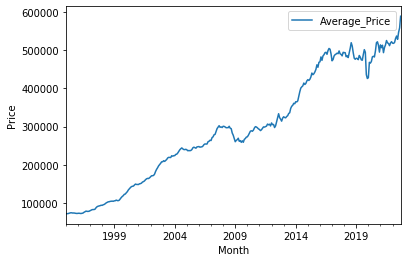

In [19]:
# Line plot showing change in average prices over 20 years in Brent
brent_prices = df[df['London_Borough']=='Brent']
ax = brent_prices.plot(kind ='line', x = 'Month', y='Average_Price')
ax.set_ylabel('Price')

In [20]:
# Extracting Year column from Month column to reduce datapoints
df['Year'] = df['Month'].apply(lambda t: t.year)

In [21]:
# Grouping dataframe by boroughs and years
dfg = df.groupby(['London_Borough','Year']).mean()
dfg.head()

Average_Price
London_Borough     Year               
Barking & Dagenham 1995   51817.969390
                   1996   51718.192690
                   1997   55974.262309
                   1998   60285.821083
                   1999   65320.934441

In [22]:
# Resetting index for easier computations
dfg = dfg.reset_index(level=[0,1])
dfg.head()

,London_Borough,Year,Average_Price
0,Barking & Dagenham,1995,51817.969390
1,Barking & Dagenham,1996,51718.192690
2,Barking & Dagenham,1997,55974.262309
3,Barking & Dagenham,1998,60285.821083
4,Barking & Dagenham,1999,65320.934441


# **3. Modeling**

In [23]:
# Defining a new function to calculate ratio of average price in 2018 over average price in 1998
def create_price_ratio(x):
    year1998 = float(x['Average_Price'][x['Year']==1998])
    year2018 = float(x['Average_Price'][x['Year']==2018])
    ratio = [year2018/year1998]
    return(ratio)

In [24]:
# Calling the earlier defined function create_price_ratio() to iterate over all boroughs
final = {}
boroughs = dfg['London_Borough'].unique()
for i in boroughs:
    final[i]=create_price_ratio((dfg[dfg['London_Borough']==i]))
print(final)

{'Barking & Dagenham': [4.89661861291754], 'Barnet': [4.358195917538044], 'Bexley': [4.248977046127877], 'Brent': [4.8945544971392865], 'Bromley': [4.0947846853338765], 'Camden': [4.935353408884261], 'Croydon': [4.201100280024767], 'Ealing': [4.311450902121834], 'Enfield': [4.26347158349581], 'Greenwich': [4.763036347329193], 'Hackney': [6.198285561008662], 'Hammersmith & Fulham': [4.137798101936229], 'Haringey': [5.134624964136042], 'Harrow': [4.0591964329643195], 'Havering': [4.325230371335308], 'Hillingdon': [4.2002730803844575], 'Hounslow': [3.976409106143329], 'Islington': [4.844048012802298], 'Kensington & Chelsea': [5.082465066092464], 'Kingston upon Thames': [4.270549521484271], 'Lambeth': [4.957751163514063], 'Lewisham': [5.449221041059685], 'Merton': [4.741273313294604], 'Newham': [5.305390437201879], 'Redbridge': [4.471182006097364], 'Richmond upon Thames': [4.005161895721457], 'Southwark': [5.516485302379376], 'Sutton': [4.118522608573157], 'Tower Hamlets': [4.6267010400611

In [25]:
# Creating a new dataframe from the obtained dictionary
df_ratios = (pd.DataFrame(final)).T.reset_index()
df_ratios = df_ratios.rename(columns = {'index':'Boroughs',0:'Avg_Diff'})
df_ratios.head()

,Boroughs,Avg_Diff
0,Barking & Dagenham,4.896619
1,Barnet,4.358196
2,Bexley,4.248977
3,Brent,4.894554
4,Bromley,4.094785


In [26]:
# Getting Top 15 values in Avg column
top15 = df_ratios.sort_values('Avg_Diff', ascending=False).head(15)

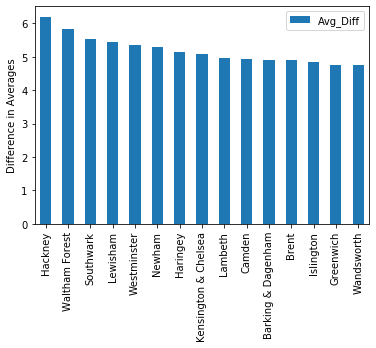

In [27]:
# Plotting final results on a bar plot
ax = top15[['Boroughs','Avg_Diff']].plot(kind='bar')
ax.set_xticklabels(top15.Boroughs)
ax.set_ylabel('Difference in Averages')
ax

### 4. Conclusion

Over the last 2 decades, out of all 32 boroughs in Greater London, **Hackney** has seen the greatest increase in housing prices, on average, followed by **Waltham Forest, Southwark, Lewisham** and **Westminster**.